# New Section

2481it [00:12, 199.08it/s]


(2481, 64, 64, 3)
83683744/83683744 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                            

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-2-4c1c1a7b225d>:106: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/30
31/31 [==============================] - ETA: 0s - loss: 1.0744 - accuracy: 0.5469
Epoch 1: val_loss improved from inf to 0.67839, saving model to Xception_Model.hdf5
31/31 [==============================] - 289s 9s/step - loss: 1.0744 - accuracy: 0.5469 - val_loss: 0.6784 - val_accuracy: 0.6016 - lr: 0.0030
Epoch 2/30
31/31 [==============================] - ETA: 0s - loss: 0.9990 - accuracy: 0.5539
Epoch 2: val_loss did not improve from 0.67839
31/31 [==============================] - 280s 9s/step - loss: 0.9990 - accuracy: 0.5539 - val_loss: 0.6900 - val_accuracy: 0.4889 - lr: 0.0030
Epoch 3/30
31/31 [==============================] - ETA: 0s - loss: 0.9086 - accuracy: 0.6154
Epoch 3: val_loss improved from 0.67839 to 0.67824, saving model to Xception_Model.hdf5
31/31 [==============================] - 274s 9s/step - loss: 0.9086 - accuracy: 0.6154 - val_loss: 0.6782 - val_accuracy: 0.4930 - lr: 0.0030
Epoch 4/30
31/31 [==============================] - ETA: 0s - loss: 0.

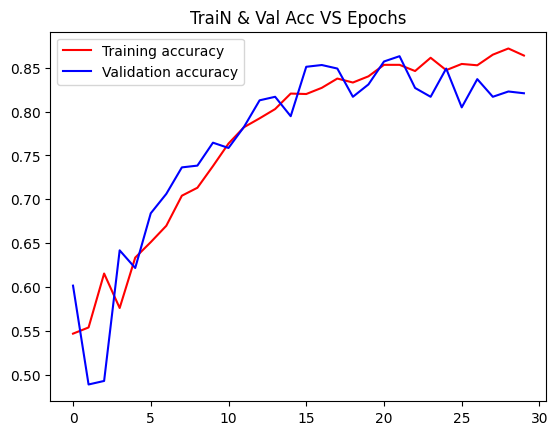

<Figure size 640x480 with 0 Axes>

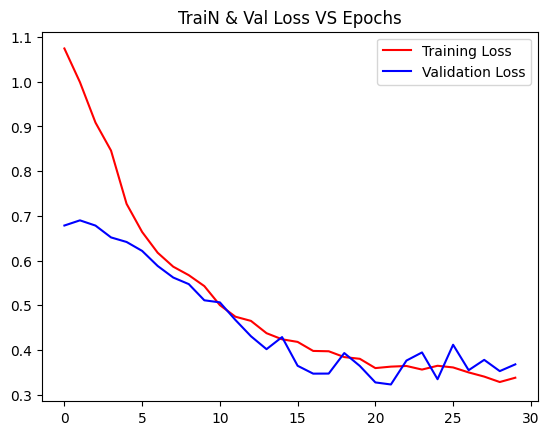

<Figure size 640x480 with 0 Axes>

16/16 [==============================] - 8s 490ms/step - loss: 0.3228 - accuracy: 0.8632
Test Loss: 0.32280367612838745
Test accuracy: 86.3179087638855
16/16 [==============================] - 9s 489ms/step
Test accuracy: 86.3179087638855
Confusion Score = [[217  22]
 [ 46 212]]
Precision = 0.905982905982906
Recall = 0.8217054263565892
F1 Score = 0.8617886178861788


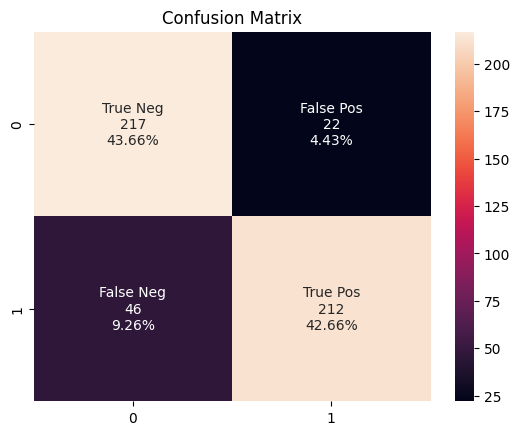

In [ ]:
#Import Necessary Libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import keras
from keras.utils.np_utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import Xception
#from keras.models import Model, Input
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
!pip install Keras-Preprocessing
#import keras_preprocessing //error ModuleNotFoundError: No module named 'keras_preprocessing'
from keras_preprocessing import image
#from keras_preprocessing.image import ImageDataGenerator //error ModuleNotFoundError: No module named 'ImageDataGenerator'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

disease_types=['COVID', 'non-COVID']
data_dir = '/home'
train_dir = os.path.join(data_dir)
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X_Train = X_train / 255.
print(X_Train.shape)
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state = 42)


#Define Xception Model Architecture
BATCH_SIZE = 64
EPOCHS = 30
SIZE=64
N_ch=3

def build_Xception():
    xception = Xception(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = xception(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(2,activation = 'softmax', name='root')(x)

    # model
    model = Model(input,output)
    optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model


#Train the Model
model = build_Xception()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('Xception_Model.hdf5', verbose=1, save_best_only=True)
datagen = ImageDataGenerator(rotation_range=360,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True)
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))



#Plot the Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()


epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()


model.load_weights("Xception_Model.hdf5")
score = model.evaluate(X_val, Y_val ,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)


Y_pred = model.predict(X_val)
Y_predx = np.argmax(Y_pred, axis = -1)
Y_valx = np.argmax(Y_val, axis = -1)
cf_matrix = confusion_matrix(Y_valx, Y_predx)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '')
plt.title("Confusion Matrix")

cfmatrix = confusion_matrix(Y_valx, Y_predx)
precision = precision_score(Y_valx, Y_predx)
recall = recall_score(Y_valx, Y_predx)
f1score = f1_score(Y_valx, Y_predx)

print('Test accuracy:', score[1]*100)
print(f"Confusion Score = {cfmatrix}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")